# Some Important point regarding k-NN
  1. -*Easy to understand*
  2. -*Before consider Advance techniques we must consider it*
  3. -*Prediction is slow when training set is large( # samples or # features)*
 

In [1]:
!pip install --user scikit-learn
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
cancer=load_breast_cancer()

In [3]:
print("INFORMATION: {}".format(cancer.DESCR))

INFORMATION: .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0

In [4]:
print("cancer.keys(): {} ".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']) 


In [5]:
print("no of rows and columns (rows,columns): {}".format(cancer.data.shape))

no of rows and columns (rows,columns): (569, 30)


In [6]:
print("Features Name: {}".format(cancer.feature_names))

Features Name: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

In [8]:
training_accuracy=[]
testing_accuracy=[]
neighbors_setting=range(1,11)
# here we are trying neighbors from 1 to 11
for n in neighbors_setting:
    #build model
    clf=KNeighborsClassifier(n_neighbors=n)
    #fitted data into the model
    clf.fit(X_train,y_train)
    #Now, let's record Training Set accuracy
    training_accuracy.append(clf.score(X_train,y_train))
    #Now , check the generalization accuracy
    testing_accuracy.append(clf.score(X_test,y_test))

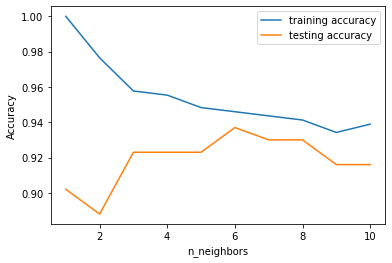

In [9]:
plt.plot(neighbors_setting,training_accuracy, label="training accuracy")
plt.plot(neighbors_setting,testing_accuracy, label="testing accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()